In [1]:
%matplotlib inline
%env OMP_NUM_THREADS=10 
%pylab inline 
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = [12, 12]

env: OMP_NUM_THREADS=10
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append("../utils")

from utils_3d import *
from sfm import *

# load data 

In [3]:
sfm3view = Sfm3view(np.eye(3),np.zeros(3))

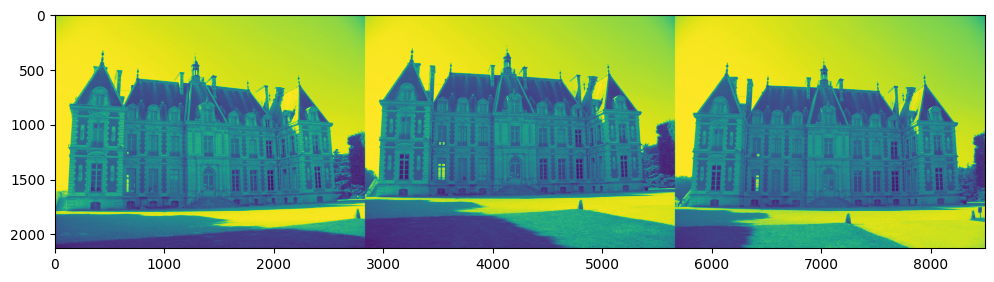

In [4]:
imshow(np.hstack([sfm3view.views[0].im_gray,sfm3view.views[1].im_gray,sfm3view.views[2].im_gray]))

# matching sift

In [5]:
# key point detect view0 and view1
sfm3view.detectKeyPoints(0)
sfm3view.detectKeyPoints(1)

In [6]:
# matching keypoint between view1 and view2
match_pair = sfm3view.matching2views(0,1)
print(len(match_pair))
print(len(sfm3view.match_manage_table))

# compute essential matrix by ransac epipolar
sfm3view.solveEpipolarEqToGetTranslation_2views(0,1)
print(len(sfm3view.match_manage_table))

1540
1540
1540
1540


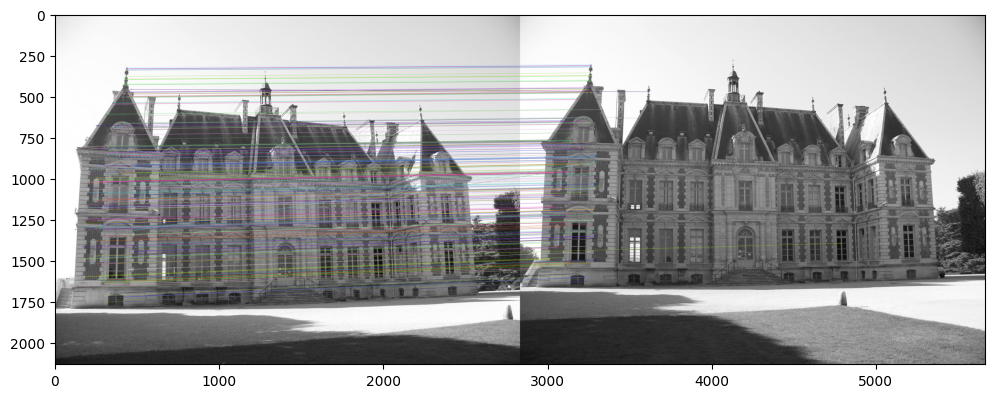

In [7]:
work = sfm3view
img_good_matches_inliers = cv2.drawMatches(work.views[0].im_gray,work.views[0].key_point_uvs,work.views[1].im_gray,work.views[1].key_point_uvs,match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

In [8]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(0,1,True)

# Extract R ,t by Fundamental matrix and K
* F = K^(-T)EK^(-1)
* E = K^(T)FK
* E= [t]xR

In [9]:
w_v1Pv2,v2Rv1,v1Lmks,inlier_mask = sfm3view.decomposeE2Rt_and_calc_Xs_wrt_v1(0,1)

(1452, 2)
candidate idx:1
inlier mask len: (1452,)
match manage table shape: 1540


# view

(124.07260745316292, 1560.2722981181967) [ 124 1542]
(168.2823883963707, 1341.809888689106) [ 167 1324]
(168.93604354869368, 782.3895136062595) [165 766]
(169.87738876309936, 786.2249385099257) [166 770]
(175.39701297296128, 1506.4048413788837) [ 175 1488]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(179.92690125914646, 1407.9721908519969) [ 179 1390]
(185.83355076286702, 1234.5070978683386) [ 184 1217]
(187.0020540856303, 1212.9863692178394) [ 185 1195]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(191.83627555267984, 1244.0651622556056) [ 190 1226]
(194.4280877887541, 1113.1801305039876) [ 192 1096]
(195.3862006925381, 906.7379971861532) [192 890]
(195.75680312059956, 1040.9202455686145) [ 193 1024]
(195.95994270635273, 1211.59122779168) [ 194 1194]
(196.8840981102217, 1024.1835111714915) [ 194 1007]
(199.04428733761668, 1187.2217609823483) [ 197 1170]
(200.03872386888148, 976.7335191240326) [197 960]
(202.258740385335, 930.7283316541173) [199 914]
(202.8650709389360

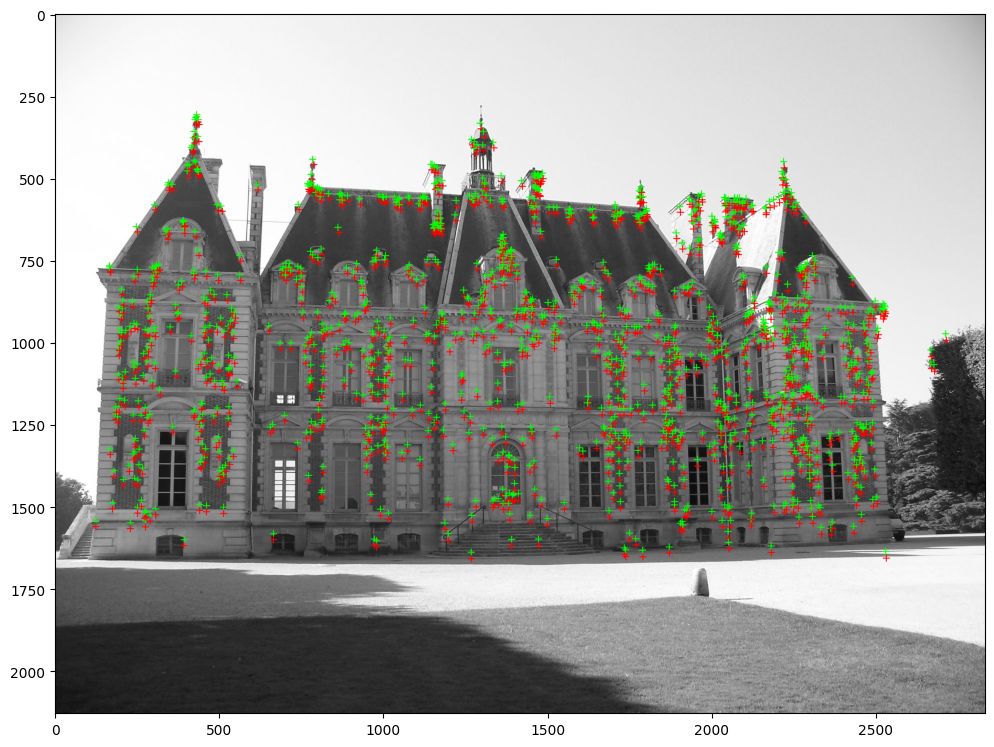

In [10]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(0,1,True)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)

canvas = copy.deepcopy(sfm3view.views[1].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)

for p,v1Lmk in zip(pts2,v1Lmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(v2Rv1.dot(v1Lmk-w_v1Pv2))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)

imshow(canvas)

In [80]:
test_wPv2,test_wRv2 = sfm3view.solvePNPToGetToGetTranslation_V2andV3(0,1)

In [81]:
test_wRv2

array([[ 0.99345581, -0.00924757, -0.11384213],
       [ 0.01271568,  0.99947572,  0.02977584],
       [ 0.11350709, -0.03102857,  0.99305255]])

(876.2685575135923, 1541.5038177352649) [ 124 1542]
(912.0043338422015, 1294.3728056315372) [ 167 1324]
(881.722602231312, 665.7020305650309) [165 766]
(882.9372739414229, 670.0007911661357) [166 770]
(931.2129949877034, 1480.4543345394966) [ 175 1488]
(928.3618579841543, 1369.161778710019) [ 179 1390]
(928.3618579841543, 1369.161778710019) [ 179 1390]
(923.6759519166599, 1173.4919779584613) [ 184 1217]
(923.0261522696128, 1149.313893074885) [ 185 1195]
(933.137478991989, 1184.0900049381269) [ 190 1226]
(933.137478991989, 1184.0900049381269) [ 190 1226]
(926.954616213056, 1036.893221943339) [ 192 1096]
(914.4713973502938, 805.4705895683409) [192 890]
(923.4608352607738, 955.8051223788347) [ 193 1024]
(934.6760684671633, 1147.6044198569366) [ 194 1194]
(925.1055479095968, 936.8585801049494) [ 194 1007]
(935.859812178321, 1120.2442414584266) [ 197 1170]
(925.0214889201375, 883.7346249254908) [197 960]
(925.8985107599759, 832.0266391552145) [199 914]
(929.7112237031994, 921.9096174340084)

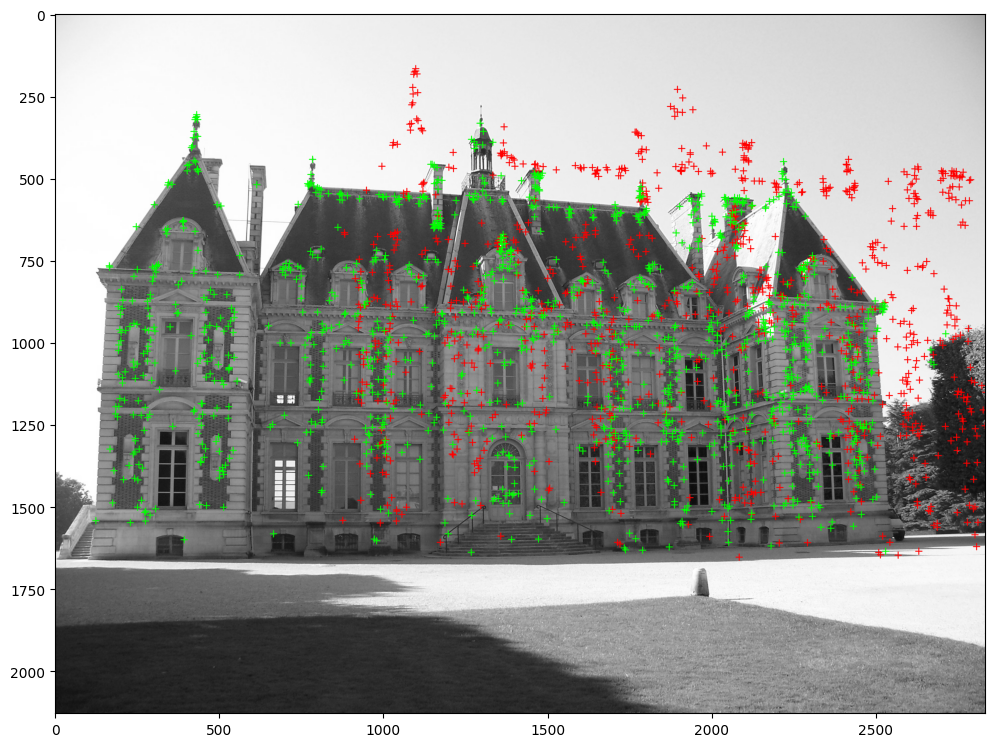

In [82]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(0,1,True)
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
pts2_,lmks,_ = sfm3view.get2D_3Dcoresspondance(0,1,True)

canvas = copy.deepcopy(sfm3view.views[1].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)
for p,v1Lmk in zip(pts2,v1Lmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(test_wRv2.T.dot(v1Lmk-test_wPv2))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)
        
imshow(canvas)

In [18]:
print(v1Lmks)

[[-2.57927436  1.13801183  5.77432419]
 [-2.53757057  0.67314205  5.90302712]
 [-2.65896477 -0.59301571  6.17802022]
 ...
 [ 3.4385821   0.23247804  7.88313935]
 [ 3.4385821   0.23247804  7.88313935]
 [ 3.47665493 -0.02055558  7.71374131]]


In [ ]:
pts2,lmks,gids = sfm3view.get2D_3Dcoresspondance(0,1,True)

In [ ]:
XX = sfm3view.K.dot(sfm3view.views[1].R.T.dot(lmks[0]-sfm3view.views[1].t))
u = XX[0]/XX[2]
v = XX[1]/XX[2]

In [ ]:
print(u,v)
print(pts2[0])
print(lmks[1000])

print(v1Lmks[1000])

In [ ]:
print(v2Rv1)
print(sfm3view.views[1].R.T)

print(w_v1Pv2)
print(sfm3view.views[1].t)

In [ ]:
sfm3view.views[1].key_point_uvs[354].pt

In [ ]:
sfm3view.match_manage_table

# Third View PNP

In [40]:
# matching v1 and v2
sfm3view.detectKeyPoints(2)
v2_v3_match_pair = sfm3view.matching2views(1,2)

wPv3,wRv3 = sfm3view.solvePNPToGetToGetTranslation_V2andV3(1,2)



#(success, rot_vec, trans_vec) = cv2.solvePnP(wLmks, ptsPNP_v3.astype(np.float64), K.astype(np.double), np.zeros((5, 1)), flags=cv2.SOLVEPNP_ITERATIVE)
 

error: OpenCV(4.7.0) /io/opencv/modules/calib3d/src/solvepnp.cpp:438: error: (-215:Assertion failed) npoints == 3 || npoints == 4 in function 'solveP3P'


In [ ]:
print(np.linalg.det(wRv3))

In [ ]:
img_good_matches_inliers = cv2.drawMatches(sfm3view.views[1].im_gray,sfm3view.views[1].key_point_uvs,sfm3view.views[2].im_gray,sfm3view.views[2].key_point_uvs,v2_v3_match_pair[:200],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow(img_good_matches_inliers)

In [ ]:
pts1,pts2,_ = sfm3view.get2D_2Dcoresspondance(1,2,True)

canvas = copy.deepcopy(sfm3view.views[2].im_gray)
canvas = cv2.cvtColor(canvas,cv2.COLOR_GRAY2RGB)
for p,v1Lmk in zip(pts2,v1Lmks):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = sfm3view.K.dot(wRv3.T.dot(v1Lmk-wPv3))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < canvas.shape[0] and 0 < v < canvas.shape[1]:
        print((u,v),p)

In [ ]:
imshow(canvas)

In [ ]:
import json
d = {}
for ii,dd in enumerate(sfm3view.match_manage_table):
    d[ii] = {"V0":dd["V0"],"V1":dd["V1"],"V2":dd["V2"]}

with open("tmp.json",mode="w") as fp:
    json.dump(d,fp)


In [ ]:
out_pcl_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test2.ply"
out_camera_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera2.ply"

wPv1 = np.array([0,0,0])
wRv1 = np.eye(3)

wLmks = wRv1.dot(v1Lmks.T).T + wPv1
save_3dpoints_ply(5*wLmks,out_pcl_file_name,[255,0,0])

wRv2 = wRv1.dot(v2Rv1.T)
wPv2 = wPv1 + wRv2.dot(w_v1Pv2)

Ps = np.array([wPv1,wPv2,wPv3])
Rs= np.array([wRv1,wRv2,wRv3])

generate_multiple_camera_ply(5*Ps,Rs,out_camera_file_name,[0,255,0],False)

for p,mask,wLmk in zip(sfm3view.match_manage_table,inlier_mask,wLmks):
    p["wLmk"] = wLmk
    p["inlier"] = mask

# BA

In [ ]:
optimizer = g2o.SparseOptimizer()
solver = g2o.BlockSolverSE3(g2o.LinearSolverPCGSE3())
solver = g2o.OptimizationAlgorithmLevenberg(solver)
optimizer.set_algorithm(solver)

focal_length = K[0,0]
principal_point = (K[0,2], K[1,2])
cam = g2o.CameraParameters(focal_length, principal_point, 0)
cam.set_id(0)
optimizer.add_parameter(cam)

In [ ]:
Rs[1]

In [ ]:
poses = []
for i,(R,t) in enumerate(zip(Rs,Ps)):
    pose = g2o.SE3Quat(R, t)
    poses.append(pose)
    
    v_se3 = g2o.VertexSE3Expmap()
    v_se3.set_id(i)
    v_se3.set_estimate(pose)
    if i < 1:
        v_se3.set_fixed(True)
    optimizer.add_vertex(v_se3)

In [ ]:
XX = K.dot(Rs[1].T.dot((wLmks[0]-Ps[1])))
u = XX[0]/XX[2]
v = XX[1]/XX[2]

In [ ]:
print(u,v)

In [ ]:
cam.cam_map(poses[1] * wLmks[200])

In [ ]:
print(pts2_inliers[200])

In [ ]:
from collections import defaultdict

In [ ]:
point_id = Rs.shape[0]
inliers = dict()
sse = defaultdict(float)

match_pts = np.array([pts1_inliers,pts2_inliers]).transpose(1,0,2)

for i, (point,match_pt_views) in enumerate(zip(wLmks,match_pts)):
    visible = []
    for j, (pose,match_pt) in enumerate(zip(poses,match_pt_views)):
        #z = cam.cam_map(pose * point)
        R = pose.matrix()[:3,:3]
        t = pose.matrix()[:3,3]
        XX = K.dot(R.T.dot((point-t)))
        u = XX[0]/XX[2]
        v = XX[1]/XX[2]
        if 0 <= u < K[0,2] * 2 and 0 <= v < K[1,2] * 2:
            visible.append((j, [u,v],match_pt))
    if len(visible) < 2:
        continue

    vp = g2o.VertexPointXYZ()
    vp.set_id(point_id)
    vp.set_marginalized(True)
    vp.set_estimate(point)
    optimizer.add_vertex(vp)

    inlier = True
    for j, z, pt in visible:
        print(j,z,pt)
        edge = g2o.EdgeProjectXYZ2UV()
        edge.set_vertex(0, vp)
        edge.set_vertex(1, optimizer.vertex(j))
        edge.set_measurement(pt)
        edge.set_information(np.identity(2))

        edge.set_robust_kernel(g2o.RobustKernelHuber())

        edge.set_parameter_id(0, 0)
        optimizer.add_edge(edge)

    # if inlier:
    #     inliers[point_id] = i
    #     error = cam.cam_map(pose *vp.estimate()) -visible[i][2]
    #     sse[0] += np.sum(error ** 2)
    point_id += 1

In [ ]:
pts2_inliers

In [ ]:
print("num vertices:", len(optimizer.vertices()))
print("num edges:", len(optimizer.edges()))

In [ ]:
print("Performing full BA:")
optimizer.initialize_optimization()
optimizer.set_verbose(True)
optimizer.optimize(100)

In [ ]:
# for i in inliers:
#     vp = optimizer.vertex(i)
#     error = vp.estimate() - wLmks[inliers[i]]
#     sse[1] += np.sum(error ** 2)

# print("\nRMSE (inliers only):")
# print("before optimization:", np.sqrt(sse[0] / len(inliers)))
# print("after  optimization:", np.sqrt(sse[1] / len(inliers)))

In [ ]:
vertices = optimizer.vertices()

Rs_ba = []
Ps_ba = []
for i in range(2):
    R = vertices[i].estimate().rotation().matrix()
    t = vertices[i].estimate().translation()
    Rs_ba.append(R)
    Ps_ba.append(t)

Rs_ba = np.array(Rs_ba)
Ps_ba = np.array(Ps_ba)

In [ ]:
wLmks_ba = []
for i in range(2,len(vertices)):
    wLmks_ba.append(vertices[i].estimate())
wLmks_ba = np.array(wLmks_ba)

In [ ]:
out_pcl_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/model_test2_ba.ply"
out_camera_ba_file_name = "/home/refsys/Desktop/sfm/viewer/webgl/static/model/old/camera2_ba.ply"

In [ ]:
save_3dpoints_ply(5*wLmks_ba,out_pcl_ba_file_name,[0,255,255])

generate_multiple_camera_ply(5*Ps_ba,Rs_ba,out_camera_ba_file_name,[0,255,255],False)

In [ ]:
import copy
canvas = copy.deepcopy(im2)
for p,wLmk in zip(pts2_inliers,wLmks_ba):
    cv2.drawMarker(canvas,
                position=p,
                color=(0, 255, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    XX = K.dot(Rs_ba[1].T.dot((wLmk-Ps_ba[1])))
    u = XX[0]/XX[2]
    v = XX[1]/XX[2]
    
    cv2.drawMarker(canvas,
                position=(int(u),int(v)),
                color=(255, 0, 0),
                markerType=cv2.MARKER_CROSS,
                markerSize=20,
                thickness=2,
                line_type=cv2.LINE_4
                )
    
    if 0 < u < im1.shape[0] and 0 < v < im1.shape[1]:
        print((u,v),p)
        
imshow(canvas)

In [ ]:
Ps_ba

In [ ]:
Ps